<p style="font-family:Verdana; font-size: 26px; color: magenta"> 2 Prediction of Wine type</p>

<p style="font-family:Verdana; font-size: 18px; color: darkorange"> 1. Data Collection:</p> 
<p style="font-family:Verdana; font-size: 18px; color: darkorange"> 2. Data Preprocessing:</p>
<p style="font-family:Verdana; font-size: 18px; color: darkorange"> 3. Feature Selection:</p>
<p style="font-family:Verdana; font-size: 18px; color: darkorange"> 4. Splitting the Dataset:</p>
<p style="font-family:Verdana; font-size: 18px; color: darkorange"> 5. Training the Model:</p>
<p style="font-family:Verdana; font-size: 18px; color: darkorange"> 6. Evaluating the Model:</p>
<p style="font-family:Verdana; font-size: 18px; color: darkorange"> 7. Making Predictions:</p>

* The dataset consists of 12 variables. Here are a few of them:

> Fixed Acidity: This refers to the non-volatile acids in the wine, which contribute to the wine's tartness.

> Volatile Acidity: This refers to acetic acid content which can contribute to a vinegar-like taste in wine.

>  Citric Acid: Citric acid is one of the fixed acids in wine.

> Residual Sugar: This is the sugar that remains after fermentation stops.

> Chlorides: Chlorides can contribute to saltiness in wine.

> Free Sulfur Dioxide: This is the sulfur dioxide that is added to wine.

> Total Sulfur Dioxide: This is the sum of bound and free sulfur dioxide.

<p style="font-family:Verdana; font-size: 18px; color: orange"> Step 1: Importing Necessary Libraries</p>

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 2: Data Preparation</p>

In [5]:
# In this step we load the dataset and encode disease labels into numbers 
# and visualize class distribution to check for imbalance.
red = pd.read_csv("../../data/winequality-red.csv", sep=';')
white = pd.read_csv("../../data/winequality-white.csv", sep=';')

red['type'] = 1
white['type'] = 0

wines = pd.concat([red, white], ignore_index=True)
wines.dropna(inplace=True)
wines.head(), wines.shape 

(   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.4              0.70         0.00             1.9      0.076   
 1            7.8              0.88         0.00             2.6      0.098   
 2            7.8              0.76         0.04             2.3      0.092   
 3           11.2              0.28         0.56             1.9      0.075   
 4            7.4              0.70         0.00             1.9      0.076   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 11.0                  34.0   0.9978  3.51       0.56   
 1                 25.0                  67.0   0.9968  3.20       0.68   
 2                 15.0                  54.0   0.9970  3.26       0.65   
 3                 17.0                  60.0   0.9980  3.16       0.58   
 4                 11.0                  34.0   0.9978  3.51       0.56   
 
    alcohol  quality  type  
 0      9.4        5     1  
 1      9.8   

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 2+: Plotting Distribution of Alcohol  </p>

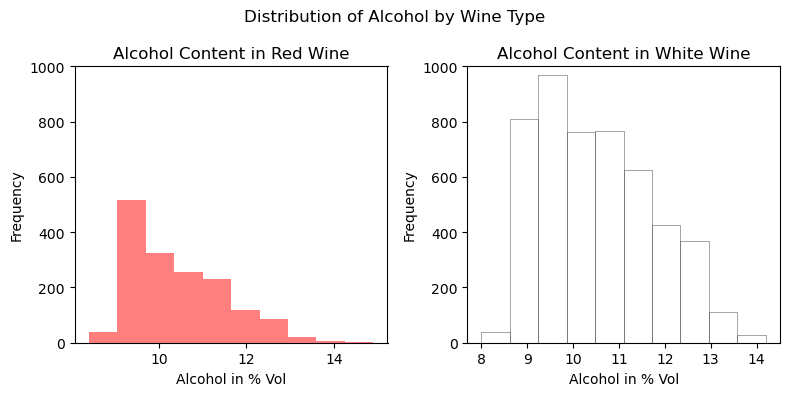

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].hist(wines[wines['type'] == 1].alcohol, bins=10, facecolor='red', alpha=0.5, label='Red wine')
ax[1].hist(wines[wines['type'] == 0].alcohol, bins=10, facecolor='white', edgecolor='black', lw=0.5, alpha=0.5, label='White wine')

for a in ax:
    a.set_ylim([0, 1000])
    a.set_xlabel('Alcohol in % Vol')
    a.set_ylabel('Frequency')

ax[0].set_title('Alcohol Content in Red Wine')
ax[1].set_title('Alcohol Content in White Wine')

fig.suptitle('Distribution of Alcohol by Wine Type')
plt.tight_layout()
plt.show()

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 3: Splitting the Dataset into Test and Train Sets</p>

In [11]:
X = wines.iloc[:, :-1]
y = wines['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=45)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (4288, 12) (4288,)
Test set: (2209, 12) (2209,)


<p style="font-family:Verdana; font-size: 20px; color: orange"> 4. Creating Neural Network Model</p>

In [13]:
# Input layer: Dense(12) with 12 neurons and ReLU activation function, 
# where input_dim=12 matches the number of features (columns) in the input data.

# Hidden layer: Dense(9) with 9 neurons and ReLU activation.

# Output layer: Dense(1) with a single neuron and a sigmoid activation function, 
# since this is a binary classification problem (predicting red or white wine).

# The model is compiled using the binary crossentropy loss function and the Adam optimizer.

In [12]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=12))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\Users\38067\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 5: Training the Model and Making Predictions</p>

In [14]:
model.fit(X_train, y_train, epochs=3, batch_size=1, verbose=1)

y_pred = model.predict(X_test)

print("Predictions: ", y_pred)

Epoch 1/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.8879 - loss: 0.3345
Epoch 2/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9268 - loss: 0.2048
Epoch 3/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9453 - loss: 0.1682
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Predictions:  [[0.07914836]
 [0.03664708]
 [0.02076787]
 ...
 [0.02862129]
 [0.04355928]
 [0.00070597]]


In [ ]:
# Trains the model using the training data (X_train, y_train) for 3 epochs with a batch size of 1.
# After training the model is used to make predictions on the test data (X_test).
# The predictions (y_pred) are returned.

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 6: Evaluating Logistic Regression Model</p>

In [ ]:
# The output shows the accuracy improves from 89.93% in the first epoch to 94.87% in the third 
# while the loss decreases from 0.3280 to 0.1415 indicating better performance.